<a href="https://colab.research.google.com/github/MinhVuong2000/DataComp_Centric_FPT/blob/main/DataAugmentation_DataCentricFPTComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset  drive	sample_data


In [ ]:
!unzip 'drive/MyDrive/dataset_FPTCentric.zip' -d '/content'

Archive:  drive/MyDrive/dataset_FPTCentric.zip
 extracting: /content/dataset/images/public_test/1000.jpg  
 extracting: /content/dataset/images/public_test/1001.jpg  
 extracting: /content/dataset/images/public_test/1002.jpg  
 extracting: /content/dataset/images/public_test/1003.jpg  
 extracting: /content/dataset/images/public_test/1004.jpg  
 extracting: /content/dataset/images/public_test/1005.jpg  
 extracting: /content/dataset/images/public_test/1006.jpg  
 extracting: /content/dataset/images/public_test/1007.jpg  
 extracting: /content/dataset/images/public_test/1008.jpg  
 extracting: /content/dataset/images/public_test/1009.jpg  
 extracting: /content/dataset/images/public_test/1010.jpg  
 extracting: /content/dataset/images/public_test/1011.jpg  
 extracting: /content/dataset/images/public_test/1012.jpg  
 extracting: /content/dataset/images/public_test/1013.jpg  
 extracting: /content/dataset/images/public_test/1014.jpg  
 extracting: /content/dataset/images/public_test/1015

# Bounding box

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
def read_label(label_path):
  with open(label_path) as f:
    for line in f:
      yield list(map(float,line.split()))

def save_bounded_box_img(img_path, label_path, save_dir=''):
  im = cv2.imread(img_path) 
  img_h, img_w = im.shape[:2]
  print(im.shape[:2])
  for obj in read_label(label_path):
    start_point = (int((obj[1]-obj[3]/2)*img_w), int((obj[2]-obj[4]/2)*img_h))
    end_point = (int((obj[1]+obj[3]/2)*img_w), int((obj[2]+obj[4]/2)*img_h))
    if obj[0]==0:
      color = (255, 0, 0)
      image = cv2.rectangle(im, start_point, end_point, color, thickness=-1) 
    elif obj[0]==1:
      color = (0, 255, 0)
      image = cv2.rectangle(im, start_point, end_point, color, thickness=-1) 
    else:
      color = (0, 0, 255)
      im = cv2.rectangle(im, start_point, end_point, color, thickness=-1) 
  cv2.imwrite(save_dir + img_path.split('/')[-1], im)

In [ ]:
# def rectangle_yolo(coords, img_shape, linewidth=1, edgecolor='red', facecolor='none'):
#   """
#   input:
#     coords: 5 values: 
#       [0]: classification, 
#       [1,2]: x_center, y_center, 
#       [3,4]: width, height
#     imgm_shape: width & height of image, is a tuple
#   return: Rectangle
#   """
#   w_real = coords[3]*img_shape[0]
#   h_real = coords[4]*img_shape[1]
#   return patches.Rectangle((coords[1]*img_shape[0]-w_real/2, coords[2]*img_shape[1]-h_real/2), w_real, h_real, 
#                            linewidth=linewidth, edgecolor=edgecolor, facecolor=facecolor
#                            )
  

# def save_bounded_box_img(img_path, label_path, save_dir=''):
#   im = Image.open(img_path)
#   img_shape = im.size
#   print(img_shape)
#   plt.figure(figsize=(img_shape[0]/100.0,img_shape[1]/100.0))
#   fig, ax = plt.subplots()
#   ax.imshow(im)
#   for obj in read_label(label_path):
#     if obj[0]==0:
#       rect = rectangle_yolo(obj, img_shape, edgecolor='none', facecolor='red')
#       ax.add_patch(rect)
#     elif obj[0]==1:
#       rect = rectangle_yolo(obj, img_shape, edgecolor='none', facecolor='blue')
#       ax.add_patch(rect)
#     else:
#       rect = rectangle_yolo(obj, img_shape, edgecolor='none', facecolor='green')
#       ax.add_patch(rect)
#   plt.axis('off')
#   plt.savefig(save_dir + img_path.split('/')[-1], dpi=200, bbox_inches='tight', pad_inches = 0)

In [ ]:
DIR = 'dataset/{}/train/'
IMAGE_DIR = DIR.format('images')
LABEL_DIR = DIR.format('labels')

In [ ]:
save_bounded_box_img(IMAGE_DIR+"100.jpg", LABEL_DIR+"100.txt")

(720, 1280)


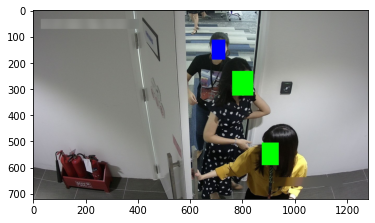

In [ ]:
im = Image.open("100.jpg")
plt.imshow(im)

In [ ]:
!mkdir gen_data

save_dir = 'gen_data/'
for file_name in os.listdir(IMAGE_DIR):
  img_path = IMAGE_DIR + file_name
  lbl_path = LABEL_DIR + file_name[:-3] + 'txt'
  save_bounded_box_img(img_path, lbl_path, save_dir)
  plt.clf()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>